[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UM-RMRS/raster_tools/blob/main/notebooks/creation_module.ipynb)

# Raster Tools Creation Module
## This notebook demonstrates the functionality of the Raster Tools creation module 
by John Hogland 4/20/2023

# Install software for Colab

In [ ]:
!pip install --upgrade gdown
!pip install --upgrade numba
!pip install --upgrade geopandas
!pip install mapclassify
!pip install --upgrade datascience
!pip install --upgrade gym
!pip install --upgrade folium
!pip install raster_tools
!pip install py3dep==0.17.1

# The Process
In this notebook we download USGS 3dep products that are publicly available and use raster_tools to perform creation processing. At each step in the notebook we will discuss various aspects of the data, processing techniques, and visualization. After completing this notebook you should be very familiar with how to use the creation module.
## Steps
- 1. Create an area of interest (Missoula MT; 46.8721° N, 113.9940° W)
- 2. Use py3dep to download the dem for the area of interest
- 3. Create various rasters
- 4. Visualize outputs

## Step 1: Create an area of interest (Missoula MT; 46.8721° N, 113.9940° W)
### Import various packages

In [1]:
from raster_tools import Raster, general, surface, creation
import py3dep
import geopandas as gpd
import numpy as np

from shapely.geometry import shape, Polygon

### Define area of interest (AOI) using the coordinates of Missoula MT

In [2]:
loc = {"type": "Point", "coordinates": [-113.994, 46.8721]}

geom = shape(loc)
geom_buff = gpd.GeoSeries(
    geom.buffer(0.02), crs="EPSG:4326"
)  # buffer out 0.02 degrees to get an area
geom_buff.explore()  # visualize

## Step 2: Get DEM data from USGS wms servers
### Create a get_3dep_data function to download USGS data and return a Raster object

In [ ]:
def get_3dep_data(sgeo, srv="DEM", res=30, out_crs=None):
    """
    downloads 3dep data from a specified service and resolution and returns a raster object

    sgeo: object, polygon | mulipolygon | bounding box [minx, miny, maxx, maxy] used to extract data (WGS 84 - EPSG:4326)
    srv: string, name of the 3dep service
    res: int, spatial resolution
    out_crs: object, optional crs used to project geopandas dataframe to a differnt crs

    return: raster object
    """
    ar = py3dep.get_map(srv, sgeo, resolution=res).expand_dims({"band": 1})
    out_rs = Raster(ar)
    if not out_crs is None:
        out_rs = Raster(out_rs.xdata.rio.reproject(out_crs))

    return out_rs

### Use get_3dep_data to download DEM for AOI (resolution 30 m) and save the raster.

In [ ]:
elv = get_3dep_data(
    list(geom_buff.total_bounds), srv="DEM", res=30
)  # data are returned in lat lon (WGS 84) with height in meters
elv = elv.save("elv.tif")

## Step3: Create various rasters and stack each surface into a single multi-band raster
- constant raster with a value of 10 (3 bands)
- random raster (binomial, normal, poisson, uniform, and weibull)
- numpy raster

In [3]:
# constant raster
cons10 = creation.constant_raster(elv, 10, 3)

# random rasters
d_dic = {}
for d in creation._VALID_RANDOM_DISTRIBUTIONS:
    if len(d) == 1:
        d_dic[d] = creation.random_raster(elv, distribution=d)

# numpy rasters
np_rs = Raster(np.ones((1, 300, 300)))
rint_rs = Raster(np.random.randint(0, 255, (3, 300, 300)))

## Step 4: Visualize the rasters
### Constant Raster

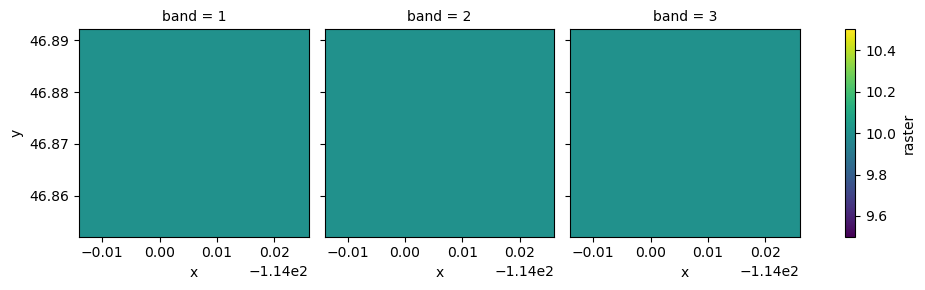

In [4]:
cons10.plot(col="band", col_wrap=3)

### Random Rasters

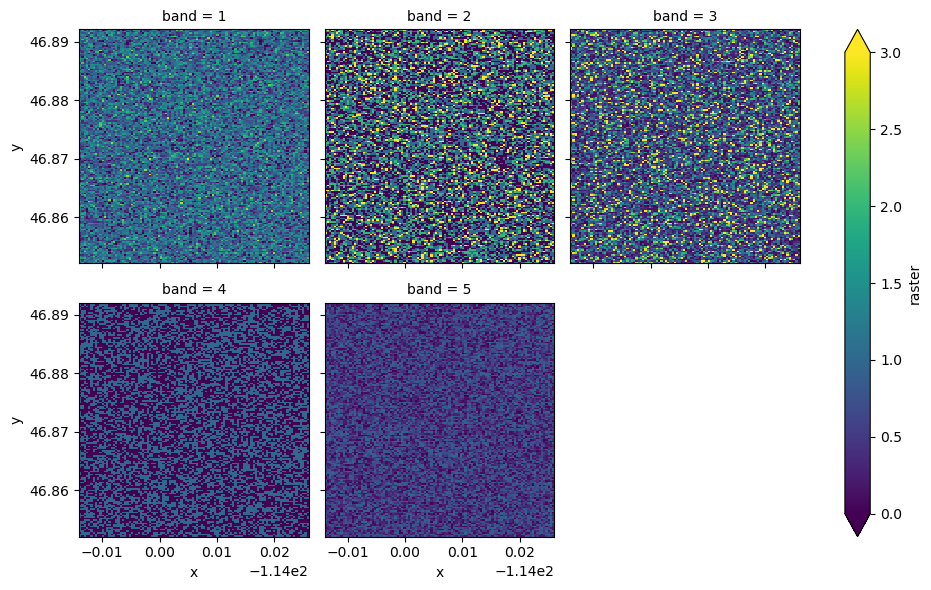

In [5]:
r_rs = general.band_concat(d_dic.values())
r_rs.plot(col="band", col_wrap=3, robust=True)

### Numpy Rasters

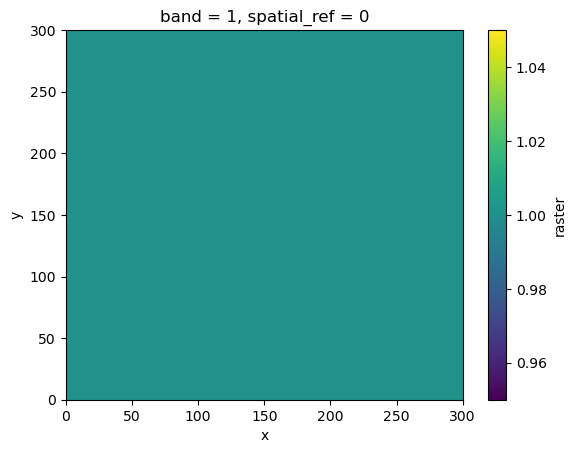

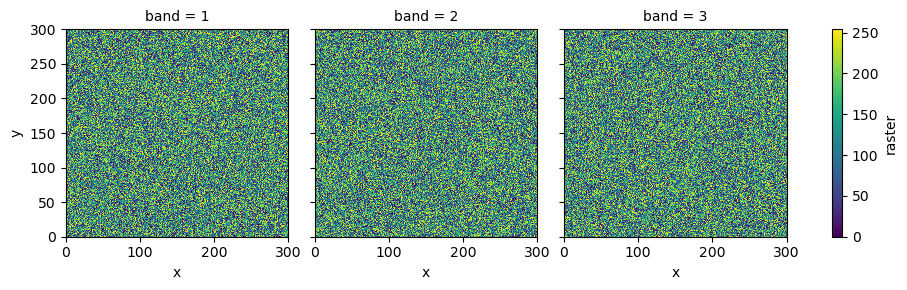

In [6]:
display(np_rs.plot())
rint_rs.plot(col="band")

# This ends the Raster Tools creation module notebook
## Check out the other notebooks:
- https://github.com/UM-RMRS/raster_tools/blob/main/notebooks/README.md
## References
- Raster-Tools GitHub: https://github.com/UM-RMRS/raster_tools
- Hogland's Spatial Solutions: https://sites.google.com/view/hoglandsspatialsolutions/home
- Dask: https://dask.org/
- Geopandas:https://geopandas.org/en/stable/
- Xarray: https://docs.xarray.dev/en/stable/
- Jupyter: https://jupyter.org/
- Anaconda:https://www.anaconda.com/
- VS Code: https://code.visualstudio.com/
- ipywidgets: https://ipywidgets.readthedocs.io/en/latest/
- numpy:https://numpy.org/
- matplotlib:https://matplotlib.org/
- folium: https://python-visualization.github.io/folium/
- pandas: https://pandas.pydata.org/
- sklearn: https://scikit-learn.org/stable/index.html